# Play Connect4

In [ ]:
!git clone https://github.com/nishantkushwaha-1999/AlphaZero_C4.git
!pip install torchinfo
!pip install pygame

In [ ]:
import os
path = os.getcwd() + "/AlphaZero_C4"
os.chdir(path)
print(path)

In [1]:
from AlphaZero.monte_carlo_tree_search import MCTS
from game import Game
import numpy as np
from IPython.display import clear_output

pygame-ce 2.4.1 (SDL 2.28.5, Python 3.10.11)


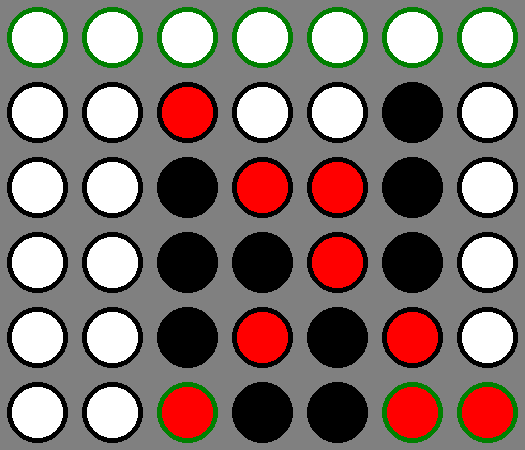

1 won


In [4]:
bot_params = {
    "C": 3,
    "num_searches": 1000,
    "dirichlet_epsilon": 0.0,
    "dirichlet_alpha": 0.71
}

game_c4 = Game(level = 7)
model = game_c4.get_engine_().eval()

mcts = MCTS(game_c4, bot_params, model)
state = game_c4.initialize()

player = 1
while True:
    display(game_c4.render_state(state, player))
    if player == 1:
        valid_moves = game_c4.get_valid_moves(state, player)
        print("valid_moves", [i for i in range(game_c4.action_size) if valid_moves[i] == 1])
        action = int(input(f"{player}:"))
        player_name = "player"
            
    else:
        flipped_state = game_c4.change_perspective(state, player)
        mcts_probs = mcts.search(flipped_state, player)
        action = np.argmax(mcts_probs)
        player_name = "bot"
        
    print(action)
    state = game_c4.get_next_state(state, action, player)
    
    value, is_terminal = game_c4.get_value_and_terminated(state, action, player)
    
    if is_terminal:
        clear_output()
        display(game_c4.render_state(state, player))
        if value == 1:
            print(player, "won")
        else:
            print("draw")
        break
        
    player = game_c4.get_opponent(player)
    clear_output()
    print("Last Play:")
    print("Player:", player_name, "Action:", action)